<a href="https://colab.research.google.com/github/jfzo/notebooks-cursos/blob/master/usando_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manejo de datos con Python y Pandas

En esta primera parte del módulo, trabajaremos con el siguiente conjunto de datos:

![Online retail](https://archive.ics.uci.edu/ml/datasets/Online%20Retail)

Citando la descripción original:

**Data Set Information:**

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Attribute Information:**

| Campo | Descripción |
|------|-----|
| InvoiceNo: | Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter **'c'**, it indicates a cancellation.|
|StockCode: | Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.|
|Description: | Product (item) name. Nominal.|
|Quantity: | The quantities of each product (item) per transaction. Numeric.|
|InvoiceDate: | Invice Date and time. Numeric, the day and time when each transaction was generated.|
|UnitPrice: | Unit price. Numeric, Product price per unit in sterling.|
|CustomerID: | Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.|
|Country: | Country name. Nominal, the name of the country where each customer resides. |


In [0]:
#@title Acceso a librería Pandas
import pandas as pd

Es posible cargar la data en un Dataframe a partir de la URL del repositorio:

In [0]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

df.to_excel('/content/gdrive/My Drive/Colab Notebooks/online_retail.xlsx')

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


---

También es posible cargar desde Google Drive. Las primeras dos líneas comentadas corresponden a las sentencias usadas para conectarse a su cuenta de Google Drive:

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/online_retail.xlsx', index_col="InvoiceDate")
#df.head()

Podemos averiguar el tamaño del dataframe con su propiedad ```.shape```



In [0]:
df.shape

(541909, 9)

Podemos averiguar el detalle de cada columna del dataframe con su método interno ```.info()```


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532621 entries, 0 to 541908
Data columns (total 9 columns):
Unnamed: 0     532621 non-null int64
InvoiceNo      532621 non-null object
StockCode      532621 non-null object
Description    531166 non-null object
Quantity       532621 non-null int64
InvoiceDate    532621 non-null datetime64[ns]
UnitPrice      532621 non-null float64
CustomerID     397924 non-null float64
Country        532621 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 40.6+ MB


In [0]:
df.describe()

,Unnamed: 0,Quantity,UnitPrice,CustomerID
count,532621.000000,532621.000000,532621.000000,397924.000000
mean,271182.113612,10.239972,3.847621,15294.315171
std,156533.716737,159.593551,41.758023,1713.169877
min,0.000000,-9600.000000,-11062.060000,12346.000000
25%,135604.000000,1.000000,1.250000,13969.000000
50%,271292.000000,3.000000,2.080000,15159.000000
75%,406975.000000,10.000000,4.130000,16795.000000
max,541908.000000,80995.000000,13541.330000,18287.000000


In [0]:
#@title Visualización de los primeros 8 registros del dataframe
df.head(8)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom


In [0]:
#@title Ordenamiento de los registros según columna *Descripción* 
df['Description'] = df['Description'].str.strip()
df.sort_values(by='Description', ascending=True).head(8)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20749,20749,538071,21120,*Boombox Ipod Classic,1,2010-12-09 14:09:00,16.98,NaN,United Kingdom
35675,35675,539437,20954,*USB Office Mirror Ball,1,2010-12-17 14:54:00,8.47,NaN,United Kingdom
37095,37095,539453,20954,*USB Office Mirror Ball,1,2010-12-17 17:08:00,8.47,NaN,United Kingdom
394482,394482,570872,22418,10 COLOUR SPACEBOY PEN,1,2011-10-12 16:40:00,1.63,NaN,United Kingdom
381759,381759,569893,22418,10 COLOUR SPACEBOY PEN,24,2011-10-06 15:51:00,0.85,12627.0,Germany
152701,152701,549682,22418,10 COLOUR SPACEBOY PEN,24,2011-04-11 13:22:00,0.85,12596.0,Spain
20498,20498,538057,22418,10 COLOUR SPACEBOY PEN,24,2010-12-09 13:38:00,0.85,13102.0,United Kingdom
470060,470060,576617,22418,10 COLOUR SPACEBOY PEN,2,2011-11-15 16:57:00,1.63,NaN,United Kingdom


In [0]:
#@title Considerando únicamente los campos tipo *object*
df.select_dtypes(include=['object']).head() #.copy() en lugar de .head() genera una copia del Dataframe

,InvoiceNo,StockCode,Description,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [0]:
#@title Considerando solo aquellas filas cuya columna *Country* coincida con *France*:
df[df["Country"] == "France"].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France


In [0]:
#@title Otra manera de filtrar, pero usando más de un valor de búsqueda:
df[df.Country.isin(['France','Spain'])].sort_values(by='Country', ascending=True).tail(10)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
315729,315729,564734,47590B,PINK HAPPY BIRTHDAY BUNTING,4,2011-08-28 13:32:00,5.45,12484.0,Spain
315728,315728,564734,47566,PARTY BUNTING,3,2011-08-28 13:32:00,4.95,12484.0,Spain
315727,315727,564734,23298,SPOTTY BUNTING,3,2011-08-28 13:32:00,4.95,12484.0,Spain
315726,315726,564734,47566B,TEA TIME PARTY BUNTING,3,2011-08-28 13:32:00,4.95,12484.0,Spain
315725,315725,564734,47590A,BLUE HAPPY BIRTHDAY BUNTING,4,2011-08-28 13:32:00,5.45,12484.0,Spain
315724,315724,564734,22384,LUNCH BAG PINK POLKADOT,4,2011-08-28 13:32:00,1.65,12484.0,Spain
315723,315723,564734,21625,VINTAGE UNION JACK APRON,1,2011-08-28 13:32:00,6.95,12484.0,Spain
315722,315722,564734,22611,VINTAGE UNION JACK SHOPPING BAG,1,2011-08-28 13:32:00,4.95,12484.0,Spain
414283,414283,572442,22739,RIBBON REEL CHRISTMAS SOCK BAUBLE,10,2011-10-24 12:09:00,1.65,12546.0,Spain
248794,248794,558871,21243,PINK POLKADOT PLATE,32,2011-07-04 13:19:00,1.69,12557.0,Spain


In [0]:
#@title Otra manera de filtrar, pero usando condiciones sobre más de una columna:
df[(df["InvoiceDate"] < '2011-09-01') & (df["InvoiceDate"] > '2011-01-01')].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
42481,42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
42482,42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42483,42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42484,42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
42485,42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


----
### Selección de columnas

In [0]:
df["UnitPrice"].head()

0    2.55
1    3.39
2    2.75
3    3.39
4    3.39
Name: UnitPrice, dtype: float64

### Selección de filas (registros)

In [0]:
df[4:10]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


### Selección de filas y columnas

In [0]:
df["UnitPrice"][:10]

0    2.55
1    3.39
2    2.75
3    3.39
4    3.39
5    7.65
6    4.25
7    1.85
8    1.85
9    1.69
Name: UnitPrice, dtype: float64

## Selección de multiples columnas

In [0]:
df[["InvoiceNo","UnitPrice"]][:5]

,InvoiceNo,UnitPrice
0,536365,2.55
1,536365,3.39
2,536365,2.75
3,536365,3.39
4,536365,3.39


## Contabilización de valores en una columna

In [0]:
df["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

Algo interesante

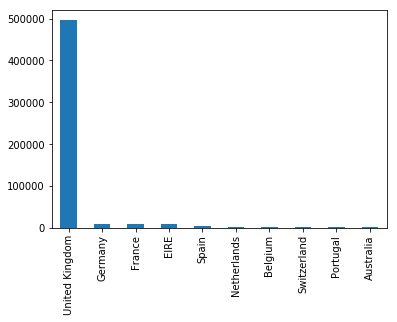

In [0]:
df["Country"].value_counts()[:10].plot(kind='bar')

## Filtrando filas por criterios en columnas

In [26]:
#@title Primero: El uso de un operador booleano genera una serie de valores booleanos con un valor por fila.
regs_ = df["UnitPrice"] > 3
regs_.head()

0    False
1     True
2    False
3     True
4     True
Name: UnitPrice, dtype: bool

Al usar la serie de valores booleanos con el dataframe obtendremos las filas en donde la serie tenía un valor ```True```.

In [27]:
df[regs_].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom


Es posible agregar más condiciones al filtro usando el operador ```&``` 

In [28]:
regs_precio = df["UnitPrice"] > 3
regs_pais = df["Country"] == "Spain"
df[regs_precio & regs_pais].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
21565,21565,538095,22504,CABIN BAG VINTAGE RETROSPOT,1,2010-12-09 14:55:00,29.95,17097.0,Spain
21571,21571,538095,22796,PHOTO FRAME 3 CLASSIC HANGING,2,2010-12-09 14:55:00,9.95,17097.0,Spain
21577,21577,538095,47566,PARTY BUNTING,1,2010-12-09 14:55:00,4.65,17097.0,Spain
21579,21579,538095,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,1,2010-12-09 14:55:00,3.75,17097.0,Spain
21580,21580,538095,22914,BLUE COAT RACK PARIS FASHION,1,2010-12-09 14:55:00,4.95,17097.0,Spain


Es posible incluso seleccionar algunas columnas

In [29]:
df[regs_precio & regs_pais][["InvoiceNo","Description","Country"]].head()

,InvoiceNo,Description,Country
21565,538095,CABIN BAG VINTAGE RETROSPOT,Spain
21571,538095,PHOTO FRAME 3 CLASSIC HANGING,Spain
21577,538095,PARTY BUNTING,Spain
21579,538095,SET/3 RED GINGHAM ROSE STORAGE BOX,Spain
21580,538095,BLUE COAT RACK PARIS FASHION,Spain


## Cálculo de medidas agregadas sobre las filas

Los Dataframes tienen un método ```.groupby()``` que es similar al método groupby de SQL.

Por ejemplo ```df.groupby("Country").aggregate(sum)```  significa: "Agrupar las filas por país y luego sumar todos los valores de cada columna correspondientes al mismo país"

In [66]:
df.groupby("Country").aggregate(sum)

,Unnamed: 0,Quantity,UnitPrice,CustomerID
Country,,,,
Australia,285150021,83653,4.054750e+03,1.569300e+07
Austria,118785389,4827,1.701520e+03,5.021102e+06
Bahrain,3226853,260,8.657000e+01,2.100270e+05
Belgium,572112325,23152,7.540130e+03,2.571829e+07
Brazil,5034064,356,1.426000e+02,4.086080e+05
Canada,36331486,2763,9.105800e+02,2.615483e+06
Channel Islands,193815157,9479,3.738550e+03,1.128522e+07
Cyprus,148231860,6317,3.920070e+03,7.715880e+06
Czech Republic,7115264,592,8.815000e+01,3.834300e+05


El dataframe resultante tiene como columna indice a "Country". Por lo tanto, al visualizar un gráfico de barras de la cantidad agregada por país, se obtiene:

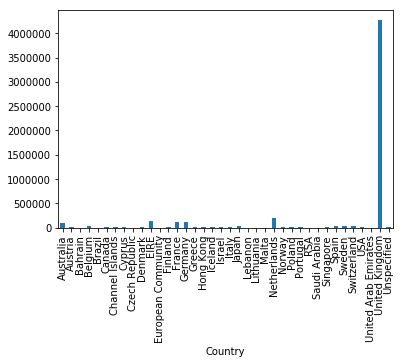

In [69]:
df.groupby("Country").aggregate(sum)["Quantity"].plot(kind="bar")

---

#Consulta de Dataframes usando SQL

La librería pandasql.

[Ir a sitio oficial](https://pypi.org/project/pandasql/)

## Intro SQL

Mostrar todos los datos de una tabla:

```mysql
SELECT * FROM table_name;
```

Query data from the specified column of a table:
Mostrar todos los datos, seleccionando una o más columnas:

```mysql
SELECT c1, c2
FROM table_name;
```

Mostrar solamente valores únicos de una columna:

```mysql
SELECT DISTINCT (c1)
FROM table_name;
```

Mostrar solamente aquellas filas cuyas columnas satisfacen la condición indicada luego del WHERE:

```sql
SELECT *
FROM table_name
WHERE condition;
```

Uso de alias para renombrar columnas en la consulta:

```sql
SELECT c1 AS new_name
FROM table_name;
```

Mostrar datos cruzando múltiples tablas mediante el uso de __inner join__ y __left join__

```sql
SELECT * 
FROM table_name_1
INNER JOIN table_name_2 ON condition;

SELECT * 
FROM table_name_1
LEFT JOIN table_name_2 ON condition;
```

![texto alternativo](https://drive.google.com/uc?export=download&id=1DTg3tBh46vvVeVg85_sOw24YPbgoerSy)

Contar la cantidad de filas entregadas por una consulta:

```sql
SELECT COUNT (*)
FROM table_name;
```

Ordenar las filas especificando también las columnas que serán usadas (instrucciones encerradas entre paréntesis cuadrados son opcionales):

```sql
SELECT c1, c2
FROM table_name
ORDER BY c1 ASC [DESC], c2 ASC [DESC],...;
```

Agrupar filas usando una o más columnas:

```sql
SELECT *
FROM table_name
GROUP BY c1, c2, ...;
```

Filtrar un grupo de filas especificando una condición:

```sql
SELECT c1, aggregate(c2)
FROM table_name
GROUP BY c1
HAVING condition;
```

In [73]:
#@title Primero deberemos instalar la librería pandasql
!pip install pandasql

  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [0]:
#@title Luego importar la librería
from pandasql import sqldf

Pandasql requiere de acceso a otras variables en la sesión. Entonces, cuando se ejecute una consulta, se le deberá entregar también un diccionario con las variables y objetos de la sesión generado a través de la función ```globals()```.  Por ejemplo, para seleccionar las columnas _StockCode_, _Quantity_ y _Country_ de todos los registros del dataframe ```df``` se ejecuta el siguiente código:

```python
q = "SELECT StockCode, Quantity, Country FROM df;"
print( sqldf(q, locals()) )
```

Dado que resultaría mucho más cómodo ejecutar la consulta sin tener que estar llamando a la función ```locals()```, podemos crear la siguiente función auxiliar:

```python
def pysqldf(q):
  return sqldf(q, globals())


q = "SELECT StockCode, Quantity, Country FROM df;"
print( pysqldf(q ) )
```

Cargamos la función recien descrita:

In [0]:
def pysqldf(q):
  return sqldf(q, globals())

In [0]:
pysqldf("SELECT * from df WHERE Country = 'Spain'")

### Alineamiento de dos dataframes mediante columnas o atributos en común.

In [0]:
dfA = pd.DataFrame(columns=['A','B','C'])
dfA = dfA.append({'A':128, 'B':'##', 'C':23.22}, ignore_index=True)
dfA = dfA.append({'A':128, 'B':'??', 'C':11.08}, ignore_index=True)
dfA = dfA.append({'A':13, 'B':'::', 'C':03.22}, ignore_index=True)
dfA = dfA.append({'A':15, 'B':';;', 'C':17.08}, ignore_index=True)

dfB = pd.DataFrame(columns=['A','D'])
dfB = dfB.append({'A':128, 'D':'..'}, ignore_index=True)
dfB = dfB.append({'A':128, 'D':',,'}, ignore_index=True)
dfB = dfB.append({'A':20, 'D':'**'}, ignore_index=True)

In [90]:
pd.merge(dfA, dfB, on = 'A', how = 'inner', sort = False)

,A,B,C,D
0,128,##,23.22,..
1,128,##,23.22,",,"
2,128,??,11.08,..
3,128,??,11.08,",,"


In [91]:
pd.merge(dfA, dfB, on = 'A', how = 'left', sort = False)

,A,B,C,D
0,128,##,23.22,..
1,128,##,23.22,",,"
2,128,??,11.08,..
3,128,??,11.08,",,"
4,13,::,3.22,NaN
5,15,;;,17.08,NaN


In [97]:
#@title Ahora mediante pandasql

q = "SELECT dfA.A, dfA.B, dfA.C, dfB.D FROM dfA INNER JOIN dfB ON dfA.A = dfB.A;"

print(pysqldf(q))

     A   B      C   D
0  128  ##  23.22  ,,
1  128  ##  23.22  ..
2  128  ??  11.08  ,,
3  128  ??  11.08  ..


In [98]:
#@title Ahora mediante pandasql

q = "SELECT dfA.A, dfA.B, dfA.C, dfB.D FROM dfA LEFT JOIN dfB ON dfA.A = dfB.A;"

print(pysqldf(q))

     A   B      C     D
0  128  ##  23.22    ,,
1  128  ##  23.22    ..
2  128  ??  11.08    ,,
3  128  ??  11.08    ..
4   13  ::   3.22  None
5   15  ;;  17.08  None
